<a href="https://colab.research.google.com/github/ndk03/Air-Quality-Prediction/blob/master/air_quality_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.python.keras.layers.core import Dense, Activation

In [0]:
air_quality = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

In [0]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

In [0]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [0]:
air_quality.fillna(air_quality.mean(), inplace= True)

In [0]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [0]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [0]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

In [0]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,18.00.00,2.60000,1360.0,150.000000,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,19.00.00,2.00000,1292.0,112.000000,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,20.00.00,2.20000,1402.0,88.000000,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,21.00.00,2.20000,1376.0,80.000000,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,22.00.00,1.60000,1272.0,51.000000,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888
5,1.078877e+18,23.00.00,1.20000,1197.0,38.000000,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848
6,1.078963e+18,00.00.00,1.20000,1185.0,31.000000,3.6,690.0,62.000000,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603
7,1.078963e+18,01.00.00,1.00000,1136.0,31.000000,3.3,672.0,62.000000,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702
8,1.078963e+18,02.00.00,0.90000,1094.0,24.000000,2.3,609.0,45.000000,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648
9,1.078963e+18,03.00.00,0.60000,1010.0,19.000000,1.7,561.0,246.896735,1705.0,113.091251,1235.0,501.0,10.3,60.2,0.7517


In [0]:
 air_quality.loc[:,'Time']=air_quality['Time']

In [0]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [0]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

In [0]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [0]:
air_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,1.112573e+18,-2.208953e+18,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1.112573e+18,-2.208949e+18,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1.112573e+18,-2.208946e+18,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1.112573e+18,-2.208942e+18,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,1.112573e+18,-2.208938e+18,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [0]:
air_quality2=air_quality.corr('pearson')
air_quality2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,-0.003249,0.041514,-0.003232,0.008010,-0.064007,-0.083633,0.401280,-0.251775,0.349315,-0.517637,0.103508,-0.450032,0.212245,-0.310146
Time,-0.003249,1.000000,0.323944,0.321097,0.102758,0.336890,0.380964,0.200493,-0.316828,0.327673,0.216572,0.239880,0.202272,-0.289543,-0.018233
CO(GT),0.041514,0.323944,1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),-0.003232,0.321097,0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.008010,0.102758,0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),-0.064007,0.336890,0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),-0.083633,0.380964,0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.401280,0.200493,0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.251775,-0.316828,-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.349315,0.327673,0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392


In [0]:
abs(air_quality2['T']).sort_values(ascending=False)

T                1.000000
AH               0.656397
RH               0.578621
PT08.S4(NO2)     0.561270
Date             0.450032
PT08.S2(NMHC)    0.241373
NOx(GT)          0.235636
Time             0.202272
C6H6(GT)         0.198956
NO2(GT)          0.165466
PT08.S3(NOx)     0.145112
NMHC(GT)         0.066782
PT08.S1(CO)      0.048627
PT08.S5(O3)      0.027172
CO(GT)           0.020257
Name: T, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# num = air_quality.keys()
# scaler = MinMaxScaler()
# scaler.fit(air_quality[num])
# air_quality[num] = scaler.transform(air_quality[num])

In [0]:
features=air_quality
target=air_quality['T']

In [0]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('T',axis=1)
features=features.drop('CO(GT)',axis=1)
features=features.drop('PT08.S5(O3)',axis=1)
features=features.drop('NMHC(GT)',axis=1)
features=features.drop('PT08.S1(CO)',axis=1)
features.tail()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),RH,AH
9352,13.5,1101.0,472.0,539.0,190.0,1374.0,29.3,0.7568
9353,11.4,1027.0,353.0,604.0,179.0,1264.0,23.7,0.7119
9354,12.4,1063.0,293.0,603.0,175.0,1241.0,18.3,0.6406
9355,9.5,961.0,235.0,702.0,156.0,1041.0,13.5,0.5139
9356,11.9,1047.0,265.0,654.0,168.0,1129.0,13.1,0.5028


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
y_test.tail()

5249    24.400000
2389    20.800000
8618     8.400000
4050    18.317829
8626     4.400000
Name: T, dtype: float64

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape


Predicted values: [19.00833068 18.74443623 13.19138122 ...  9.28185968 18.25538022
  3.98838093]


(2340,)

In [0]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9288505701939468


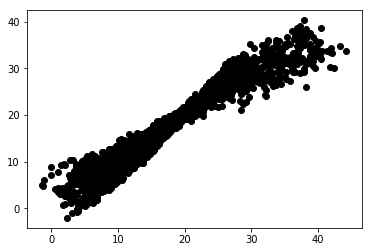

In [0]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

# Lasso regression

In [0]:
from sklearn.linear_model import Lasso

In [0]:
a=Lasso(alpha=0.5)
a.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print("R^2 on train set : {}".format(a.score(X_train, y_train)))

R^2 on train set : 0.8424337687413078


In [0]:
print("R^2 on train set : {}".format(a.score(X_test, y_test)))

R^2 on train set : 0.8501553916282969


# decision tree regression

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [0]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9964315525768502
